In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# importing te data
data=pd.read_csv('/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part1-DataPreprocessing/Section2,Part1-Data_Preprocessing/Data.csv')

In [45]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [46]:
#features
X=data[['Country', 'Age', 'Salary']]
X.head(3)

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0


In [47]:
# selecting the prediction target
y=data['Purchased']
y.head()

0     No
1    Yes
2     No
3     No
4    Yes
Name: Purchased, dtype: object

# 1. Data preprocessing

### Taking care of missing data

In [48]:
from sklearn.preprocessing import Imputer

In [49]:
imputer=Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer=imputer.fit(X[['Age','Salary']]) # fitting imputer object to X
X.iloc[:,1:3]=imputer.transform(X.iloc[:,1:3]) #replace NaN with mean values from columns Age and Salary


/home/kinga/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
X

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


### Encoding categorical values

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [52]:
labelencoder_X=LabelEncoder() # object of class LabelEncoder
X.iloc[:,0]=labelencoder_X.fit_transform(X.iloc[:, 0]) #returns first column of X encoded- 
#it means that if I select first columns I will not have countries' names but numbers 
# there is a problem with this method, because ML equation will compare those values and this is not true that 
# if France has number 0, it is lower that Spain with number 2
# To prevent from this, we are going to use OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[0]) #categorical_features=0 -nummber of columns with categorical val
X=onehotencoder.fit_transform(X).toarray() # we don't have to put column number because we specified it above

/home/kinga/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [56]:
# enoding prediction target y
labelencoder_y=LabelEncoder() # object of class LabelEncoder
y=labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Splitting dataset into train and test set

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [63]:
y_test 

array([0, 0])

In [64]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

### Features scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train) # fit the object to training set and then transform it
X_test=sc_X.transform(X_test) #we don't need to to fit it 

In [71]:
y_test

array([0, 0])

In [74]:
features=pd.DataFrame(X_train)

In [75]:
features

,0,1,2,3,4
0,-1.0,2.645751,-0.774597,0.263068,0.123815
1,1.0,-0.377964,-0.774597,-0.253501,0.461756
2,-1.0,-0.377964,1.290994,-1.975398,-1.530933
3,-1.0,-0.377964,1.290994,0.052614,-1.111420
4,1.0,-0.377964,-0.774597,1.640585,1.720297
5,-1.0,-0.377964,1.290994,-0.081312,-0.167514
6,1.0,-0.377964,-0.774597,0.951826,0.986148
7,1.0,-0.377964,-0.774597,-0.597881,-0.482149


# 2. Simple Linear Regression

In [65]:
dataset=pd.read_csv('/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part2-Regression/Section4-Simple_Linear_Regression/Salary_Data.csv')

In [66]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [83]:
#features
X=dataset.iloc[:,0]

#target 
y=dataset.iloc[:,-1]

In [87]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X_train = X_train.values.reshape(-1,1)

In [69]:
# in linear regression we don't need to take care of data scaling. This model will do it for us

In [89]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# predicting the test set results
X_test= X_test.values.reshape(-1,1)
y_pred=regressor.predict(X_test) 

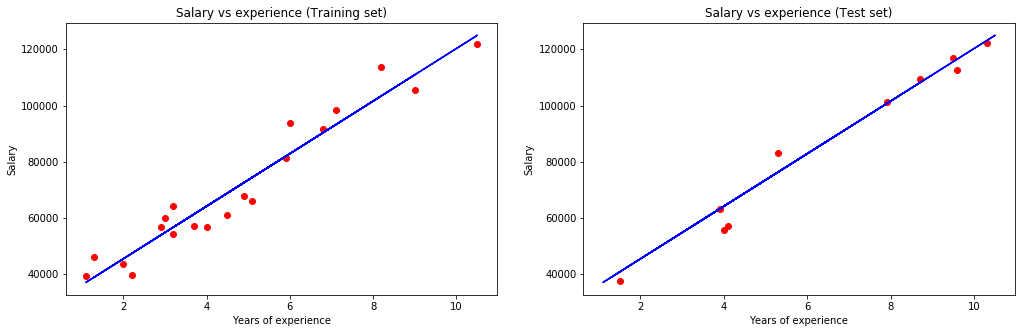

In [93]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=0.2)

# visualising the training test results
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs experience (Training set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

# visualising the test set results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # trend line is the same as above because I want to see
#how far are predicted values from trend line
plt.title('Salary vs experience (Test set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')


plt.show()

### 2.1 exercise-predicting prices of apartments using Linear Regression
- in this exercise I will predict apartment's prices depending od their surface

In [157]:
import pandas as pd
prices=pd.read_excel('/home/kinga/python/baza_bez_outliers.xlsx')
prices.columns

Index(['Unnamed: 0', 'index', 'Adres', 'Cena', 'Cena_lokalu', 'Cena_zł/m2',
       'Data_transakcji', 'Forma obrotu', 'Funkcja dominująca',
       'Funkcja podstawowa', 'Identyfikator', 'Ilość_izb', 'Kondygnacja',
       'Liczba i rodzaj pomieszczeń przynależnych', 'Nr zmiany', 'Numer KW',
       'Numer transakcji/wyceny', 'Obręb', 'Opis', 'Opis nieruchomości',
       'Podstawa prawna', 'Pole powierzchni pomieszczeń przynależnych',
       'powierzchnia_lokalu', 'Rodzaj nieruchomości', 'Rodzaj obciążenia',
       'Rodzaj prawa objętego transakcją', 'Rodzaj zapisu', 'repertorium',
       'Udział w prawie będący przedmiotem transakcji',
       'Uzbrojenie istniejące', 'Uzbrojenie możliwe do podłączenia',
       'Współrzędne geometryczne środka budynku', 'miasto', 'adres_miasto',
       'ulica', 'numer_mieszkania', 'wspolrzedne', 'dlugosc', 'szerokosc'],
      dtype='object')

In [160]:
prices=prices.loc[prices['Obręb']=='JEŻYCE']

In [161]:
#checking the index number of column 'Cena_zł/m2'
prices.columns.tolist().index('Cena_zł/m2')

5

In [162]:
#checking the index number of column 'powierzchnia_lokalu'
prices.columns.tolist().index('powierzchnia_lokalu')

22

In [163]:
# choosing a feature which is surface
X=prices.iloc[:, 22]
# choosing target
y=prices.iloc[:, 5]

In [164]:
X.describe()

count    240.000000
mean      56.432167
std       27.394913
min       20.390000
25%       37.290000
50%       48.960000
75%       66.100000
max      166.900000
Name: powierzchnia_lokalu, dtype: float64

In [165]:
y.describe()

count     240.000000
mean     4888.876542
std      1380.816178
min      1716.680000
25%      3984.357500
50%      4849.975000
75%      5898.700000
max      8061.220000
Name: Cena_zł/m2, dtype: float64

In [166]:
# splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [167]:
# fitting linear regression to the training test
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set result
y_pred=regressor.predict(X_test)

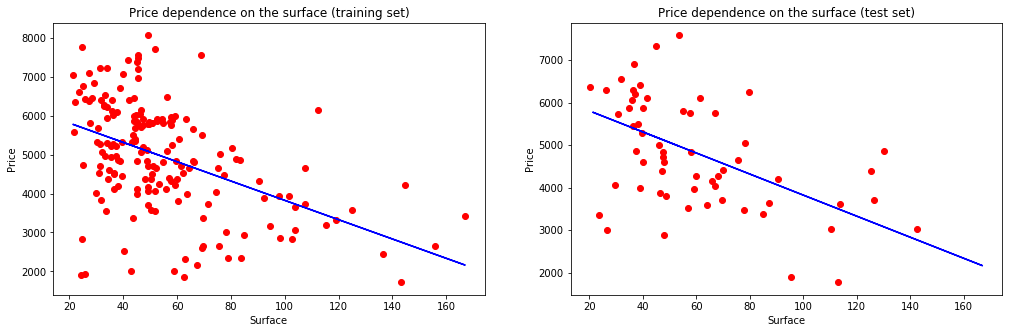

In [168]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=0.2) # space between plots

# visualising the training test results
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price dependence on the surface (training set)')
plt.xlabel('Surface')
plt.ylabel('Price')

# visualising the test set results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # trend line is the same as above because I want to see
#how far are predicted values from trend line
plt.title('Price dependence on the surface (test set)')
plt.xlabel('Surface')
plt.ylabel('Price')


plt.show()

In [169]:
# The above graphs show that there is a correlation between surface and price (the higher surface, the lower price), 
# but there are also other factors that infulence the price for egg. location, standard etc. That's why predictions 
# are not very accurate

# 3. Multiple Linear Regression

In [2]:
import pandas as pd
startups=pd.read_csv(
'/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part2-Regression/Section5-MultipleLinearRegression/50_Startups.csv')

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# In this exercise I will check the impact of R&D Spend, Administration Spend, Marketing Spend and State on the profits

In [5]:
# choosing features
X=startups.iloc[:,0:4]
# choosing predicting target
y=startups.iloc[:,-1]

In [6]:
# encoding categorical data (X)
# encoding independent value (y)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
Labelencoder_X=LabelEncoder()
X.iloc[:,3]=Labelencoder_X.fit_transform(X.iloc[:, 3]) # column 'State'-change states' names to numbers
onehotencoder=OneHotEncoder(categorical_features=[3]) # making Dummy Variables to column 'state'
X=onehotencoder.fit_transform(X).toarray()

In [7]:
# avoiding the Dummy Variable Trap. Actually we don't have to do it as the library will do it for us
X=X[:, 1:] 

In [8]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=0)

In [9]:
# fitting Multiple Linear Regression to te training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# making prediction
y_pred=regressor.predict(X_test)

In [11]:
# comparison of real and predicted profits
real_profits=y_test.reset_index(drop=True)
predicted_profits=pd.Series(y_pred, name='Predicted_profit')
comparison=pd.concat([real_profits,predicted_profits], axis=1)
comparison.head()

,Profit,Predicted_profit
0,103282.38,104440.725826
1,144259.40,132253.815677
2,146121.95,132872.071743
3,77798.83,71707.787714
4,191050.39,178678.993499


### 3.1 Building the optimal model using Backward Elimination

In [13]:
import statsmodels.formula.api as sm
# appending a column with constant value
X=np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1) # 50 rows, 1 column

In [14]:
# creating the optimal matrix of features (contains only features that are statistically siginificant)
X_opt=X[:,[0,1,2,3,4,5]] # choosing indexes of features that are going to be considered
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [16]:
X[0]

array([1.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

In [15]:
regressor_OLS.summary()
#x1- dummy variable (State)
#x2- dummy variable (State)
#x3- R&D Spend
#x4- Administration
#x5- Marketing Spend
# the statistic shows that the highest P-value has x2(0,990) so I have to remove it in next step

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.34e-27
Time:                        18:57:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# removing feature with the highest P-value (x2)
X_opt=X[:,[0,1,3,4,5]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [17]:
regressor_OLS.summary()
#x1- dummy variable (State)
#x2- R&D Spend
#x3- Administration
#x4- Marketing Spend
# the statistic shows that the highest P-value has x1(0,940) so I have to remove it in next step

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.49e-29
Time:                        18:57:39   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# removing feature with the highest P-value
X_opt=X[:,[0,3,4,5]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [19]:
regressor_OLS.summary()
#x1- R&D Spend
#x2- Administration
#x3- Marketing Spend
# the statistic shows that the highest P-value has x2(0,600) so I have to remove it in next step

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.53e-30
Time:                        18:57:42   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X_opt=X[:,[0,3,5]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [21]:
regressor_OLS.summary()
#x1- R&D Spend
#x2- Marketing Spend
# the statistic shows that the highest P-value has x2(0,06). 
# It is really close to the statistically significant value(P<0,05) so I can decide to leave it or remove
# For the purpose of this exercise (backward elimination) I will remove it

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.16e-31
Time:                        18:57:49   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_opt=X[:,[0,3]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.50e-32
Time:                        18:57:53   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_opt1=X[:,3]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_opt, y, random_state=0)
y_train = y_train.values.reshape(-1,1)
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set

y_pred_opt=regressor.predict(X_test)

In [25]:
y_pred_opt

array([[104560.72466151],
       [134156.63684656],
       [135217.63082962],
       [ 71940.15211233],
       [179267.6454832 ],
       [109737.87468807],
       [ 65389.01521965],
       [100358.92792475],
       [111350.97673001],
       [169578.4243176 ],
       [ 95535.39411668],
       [ 87431.30370649],
       [112491.63587783]])

In [34]:
# y_pred_opt is two dimensional array. I change it into one dimensional
y_pred_opt=np.concatenate(y_pred_opt)

In [35]:
y_pred_opt

array([104560.72466151, 134156.63684656, 135217.63082962,  71940.15211233,
       179267.6454832 , 109737.87468807,  65389.01521965, 100358.92792475,
       111350.97673001, 169578.4243176 ,  95535.39411668,  87431.30370649,
       112491.63587783])

In [36]:
# comparison of real and predicted profits received with and without Backward Elimination
real_profits=y_test.reset_index(drop=True)
predicted_profits_without_BE=pd.Series(y_pred, name='Predicted profit without Backward Elimination')
predicted_profits_with_BE=pd.Series(y_pred_opt, name='Predicted profit with Backward Elimination')
comparison=pd.concat([real_profits,predicted_profits_without_BE,predicted_profits_with_BE], axis=1)
comparison.head()
# Comparison shows that in this case predicted profits are w bit more accurate when using Backward Elimination

,Profit,Predicted profit without Backward Elimination,Predicted profit with Backward Elimination
0,103282.38,104440.725826,104560.724662
1,144259.40,132253.815677,134156.636847
2,146121.95,132872.071743,135217.630830
3,77798.83,71707.787714,71940.152112
4,191050.39,178678.993499,179267.645483


### 3.2 Exercise-predicting prices of apartments using Multiple Linear Regression

#### Data preprocessing

In [88]:
import pandas as pd 
real_estates=pd.read_excel('/home/kinga/python/Machine_Learning/transakcje_mieszkania.xlsx')

In [89]:
real_estates.columns

Index(['Unnamed: 0', 'index', 'Adres', 'Cena', 'Cena_lokalu', 'Cena_zł/m2',
       'Data_transakcji', 'Forma obrotu', 'Funkcja dominująca',
       'Funkcja podstawowa', 'Identyfikator', 'Ilość_izb', 'Kondygnacja',
       'Liczba i rodzaj pomieszczeń przynależnych', 'Nr zmiany', 'Numer KW',
       'Numer transakcji/wyceny', 'Obręb', 'Opis', 'Opis nieruchomości',
       'Podstawa prawna', 'Pole powierzchni pomieszczeń przynależnych',
       'powierzchnia_lokalu', 'Rodzaj nieruchomości', 'Rodzaj obciążenia',
       'Rodzaj prawa objętego transakcją', 'Rodzaj zapisu', 'repertorium',
       'Udział w prawie będący przedmiotem transakcji',
       'Uzbrojenie istniejące', 'Uzbrojenie możliwe do podłączenia',
       'Współrzędne geometryczne środka budynku', 'miasto', 'adres_miasto',
       'ulica', 'numer_mieszkania', 'wspolrzedne', 'dlugosc', 'szerokosc'],
      dtype='object')

In [90]:
real_estates=real_estates[['Obręb','powierzchnia_lokalu', 'Kondygnacja', 'Cena_zł/m2']]
real_estates.head()

,Obręb,powierzchnia_lokalu,Kondygnacja,Cena_zł/m2
358,CHARTOWO,64.0,NaN,5109.38
482,CHARTOWO,45.5,8.0,5714.29
541,CHARTOWO,64.0,1.0,4796.88
721,CHARTOWO,62.9,7.0,4960.25
742,CHARTOWO,79.0,6.0,3797.47


In [91]:
real_estates.describe()

,powierzchnia_lokalu,Kondygnacja,Cena_zł/m2
count,2521.000000,2152.000000,2521.000000
mean,53.074466,3.022072,5151.744986
std,21.453816,2.654803,1143.356914
min,11.700000,-1.000000,1535.070000
25%,38.100000,1.000000,4438.500000
50%,48.700000,2.000000,5048.570000
75%,62.600000,4.000000,5892.750000
max,246.860000,16.000000,9288.300000


In [92]:
# as there is a wide range of prices, I will detect the outliers using box plot
import plotly.offline as pyo
import plotly.graph_objs as go

data=[go.Box(y=real_estates['Cena_zł/m2'], 
    boxpoints='outliers',# displays only points that are in the set, if I enter boxpoints = 'outliers', it will only show outliers
    pointpos=0, # I determine where the points are to be located: 0-center, positive-right side, negative-left
    jitter=1)] # I determine how much points are to be scattered (along the x-axis)
     

pyo.plot(data)

'file:///home/kinga/python/Machine_Learning/temp-plot.html'

In [93]:
# Box plot shows that outliers are below 2300 zł/m2 nad above 8000 zł/m2. I will remove them
real_estates=real_estates[(real_estates['Cena_zł/m2']>2300) & (real_estates['Cena_zł/m2']<8000)]

In [94]:
real_estates.describe()

,powierzchnia_lokalu,Kondygnacja,Cena_zł/m2
count,2476.000000,2110.000000,2476.000000
mean,53.009019,3.024882,5134.369083
std,21.158942,2.671961,1065.813624
min,11.700000,-1.000000,2328.820000
25%,38.107500,1.000000,4443.130000
50%,48.800000,2.000000,5038.205000
75%,62.540000,4.000000,5872.147500
max,246.860000,16.000000,7978.950000


In [95]:
# as there is a wide range of prices, I will detect the outliers using box plot
import plotly.offline as pyo
import plotly.graph_objs as go

data=[go.Box(y=real_estates['Cena_zł/m2'], 
    boxpoints='outliers',# displays only points that are in the set, if I enter boxpoints = 'outliers', it will only show outliers
    pointpos=0, # I determine where the points are to be located: 0-center, positive-right side, negative-left
    jitter=1)] # I determine how much points are to be scattered (along the x-axis)
     

pyo.plot(data)

'file:///home/kinga/python/Machine_Learning/temp-plot.html'

In [96]:
# removing rows with NaN values
real_estates.dropna(axis=0, inplace=True)

In [97]:
real_estates.describe()

,powierzchnia_lokalu,Kondygnacja,Cena_zł/m2
count,2110.000000,2110.000000,2110.000000
mean,52.798313,3.024882,5185.916938
std,20.564385,2.671961,1074.084179
min,11.700000,-1.000000,2328.820000
25%,38.300000,1.000000,4475.107500
50%,48.800000,2.000000,5105.500000
75%,62.400000,4.000000,5921.522500
max,228.700000,16.000000,7978.950000


In [98]:
# Features
X=real_estates[['Obręb','powierzchnia_lokalu', 'Kondygnacja']]
# Predicting target
y=real_estates['Cena_zł/m2']

In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X=LabelEncoder()# object of class LabelEncoder
X.iloc[:,0]=labelencoder_X.fit_transform(X.iloc[:,0]) #returns first column of X encoded- 
#it means that if I select first columns I will not have districts' names but numbers 
# there is a problem with this method, because ML equation will compare those values 
# To prevent from this, we are going to use OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[0]) #making Dummy Variables to column 'Obręb'
X=onehotencoder.fit_transform(X).toarray() # don't have to put column number because they were specified above

/home/kinga/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Predicting prices with Backward Elimination

In [100]:
# Backward elimination
import statsmodels.formula.api as sm
# appending a column with constant value
X=np.append(arr=np.ones((2110, 1)).astype(int), values=X, axis=1) # 2152 rows, 1 column

In [101]:
# creating the optimal matrix of features (contains only features that are statistically siginificant)
#choosing indexes of features that are going to be considered
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30]] 
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()

In [39]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     25.89
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          2.65e-117
Time:                        17:36:46   Log-Likelihood:                -17394.
No. Observations:                2110   AIC:                         3.485e+04
Df Residuals:                    2080   BIC:                         3.502e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7051.5096    355.266     19.849      0.000    6354.796    7748.224
x1          -986.7244    390.627     -2.526      0.012   -1752.786    -220.663
x2         -1629.0949    369.169     -4.413      0.000   -2353.074    -905.116
x3          -788.6585    374.501     -2.106      0.035   -1523.093     -54.224
x4          -967.4840    364.623     -2.653      0.008   -1682.548    -252.419
x5         -1943.0078    581.237     -3.343      0.001   -3082.875    -803.141
x6         -2231.9381    495.646     -4.503      0.000   -3203.953   -1259.923
x7          -912.5278    395.031     -2.310      0.021   -1687.226    -137.830
x8          -855.6239    357.498     -2.393      0.017   -1556.715    -154.533
x9          -687.6020    372.366     -1.847      0.065   -1417.851      42.647
x10         -802.9347    467.596     -1.717      0.086   -1719.940     114.071
x11         1161.9580    379.024      3.066      0.002     418.651    1905.265
x12        -1198.8129    642.531     -1.866      0.062   -2458.884      61.258
x13         -633.6881    456.891     -1.387      0.166   -1529.699     262.323
x14         -504.1571    361.379     -1.395      0.163   -1212.859     204.545
x15        -2260.5123    467.227     -4.838      0.000   -3176.793   -1344.231
x16         -592.9721    356.589     -1.663      0.096   -1292.281     106.337
x17         -172.6331    516.057     -0.335      0.738   -1184.674     839.408
x18         -546.9040    357.742     -1.529      0.126   -1248.474     154.666
x19         -720.7578    366.082     -1.969      0.049   -1438.682      -2.833
x20        -2183.6448    743.313     -2.938      0.003   -3641.359    -725.930
x21         -746.5731    457.007     -1.634      0.102   -1642.812     149.666
x22         -892.1405    356.036     -2.506      0.012   -1590.365    -193.916
x23         -684.1611    357.153     -1.916      0.056   -1384.575      16.253
x24        -1197.2245    361.928     -3.308      0.001   -1907.004    -487.445
x25          769.0713    448.849      1.713      0.087    -111.169    1649.311
x26        -1065.3085    354.131     -3.008      0.003   -1759.796    -370.821
x27        -1169.8413    420.382     -2.783      0.005   -1994.254    -345.429
x28          -18.2869      1.010    -18.099      0.000     -20.268     -16.305
x29          -30.7474      8.067     -3.812      0.000     -46.567     -14.928
==============================================================================
Omnibus:                       24.553   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.287
Skew:                           0.189   Prob(JB):                     4.37e-07
Kurtosis:                       3.436   Cond. No.                     5.27e+03
==============================================================================

W

In [102]:
# the highest P-value has x17, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,23,24,25,26,27,28,29,30]] 

In [103]:
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     26.83
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          5.34e-118
Time:                        17:52:31   Log-Likelihood:                -17394.
No. Observations:                2110   AIC:                         3.485e+04
Df Residuals:                    2081   BIC:                         3.501e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6972.5679    265.511     26.261      0.000    6451.873    7493.263
x1          -907.1109    309.692     -2.929      0.003   -1514.450    -299.772
x2         -1549.5987    282.451     -5.486      0.000   -2103.515    -995.682
x3          -709.0932    289.213     -2.452      0.014   -1276.269    -141.917
x4          -887.9943    276.503     -3.212      0.001   -1430.246    -345.743
x5         -1863.2650    529.993     -3.516      0.000   -2902.637    -823.892
x6         -2152.4124    434.822     -4.950      0.000   -3005.143   -1299.682
x7          -833.0710    315.579     -2.640      0.008   -1451.955    -214.187
x8          -776.0451    266.803     -2.909      0.004   -1299.275    -252.816
x9          -608.0925    286.583     -2.122      0.034   -1170.111     -46.074
x10         -723.1363    402.087     -1.798      0.072   -1511.671      65.399
x11         1241.5436    294.996      4.209      0.000     663.026    1820.062
x12        -1118.5629    595.941     -1.877      0.061   -2287.265      50.139
x13         -554.0490    389.883     -1.421      0.155   -1318.650     210.552
x14         -424.5651    271.945     -1.561      0.119    -957.878     108.748
x15        -2180.9461    402.069     -5.424      0.000   -2969.446   -1392.446
x16         -513.3816    265.554     -1.933      0.053   -1034.161       7.397
x17         -467.2759    266.999     -1.750      0.080    -990.889      56.338
x18         -641.2285    278.321     -2.304      0.021   -1187.046     -95.411
x19        -2104.0812    704.084     -2.988      0.003   -3484.863    -723.299
x20         -667.0658    390.259     -1.709      0.088   -1432.404      98.272
x21         -812.5948    264.932     -3.067      0.002   -1332.153    -293.036
x22         -604.6164    266.432     -2.269      0.023   -1127.117     -82.116
x23        -1117.5875    272.557     -4.100      0.000   -1652.100    -583.075
x24          848.6571    380.531      2.230      0.026     102.397    1594.917
x25         -985.7467    262.323     -3.758      0.000   -1500.189    -471.305
x26        -1090.3310    346.665     -3.145      0.002   -1770.177    -410.485
x27          -18.2981      1.010    -18.124      0.000     -20.278     -16.318
x28          -30.7601      8.065     -3.814      0.000     -46.576     -14.944
==============================================================================
Omnibus:                       24.549   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.282
Skew:                           0.189   Prob(JB):                     4.38e-07
Kurtosis:                       3.436   Cond. No.                     3.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [104]:
# the highest P-value has x13, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,18,19,20,21,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     27.73
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          2.66e-118
Time:                        17:52:58   Log-Likelihood:                -17396.
No. Observations:                2110   AIC:                         3.485e+04
Df Residuals:                    2082   BIC:                         3.501e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6730.8541    203.923     33.007      0.000    6330.939    7130.769
x1          -666.4175    259.334     -2.570      0.010   -1174.999    -157.836
x2         -1308.6347    225.945     -5.792      0.000   -1751.736    -865.533
x3          -468.2214    234.393     -1.998      0.046    -927.891      -8.552
x4          -647.0473    218.469     -2.962      0.003   -1075.488    -218.606
x5         -1622.4791    502.301     -3.230      0.001   -2607.544    -637.414
x6         -1911.4380    400.491     -4.773      0.000   -2696.844   -1126.033
x7          -592.0187    266.179     -2.224      0.026   -1114.024     -70.013
x8          -535.1541    206.082     -2.597      0.009    -939.302    -131.006
x9          -367.1398    231.097     -1.589      0.112    -820.346      86.066
x10         -482.4339    364.759     -1.323      0.186   -1197.764     232.896
x11         1482.3658    241.521      6.138      0.000    1008.718    1956.014
x12         -878.3042    571.595     -1.537      0.125   -1999.262     242.653
x13         -183.6647    212.695     -0.864      0.388    -600.781     233.452
x14        -1939.9892    364.656     -5.320      0.000   -2655.118   -1224.861
x15         -272.5547    204.498     -1.333      0.183    -673.597     128.488
x16         -226.4540    206.375     -1.097      0.273    -631.178     178.270
x17         -400.3514    220.805     -1.813      0.070    -833.373      32.670
x18        -1863.0894    683.523     -2.726      0.006   -3203.549    -522.630
x19         -426.0719    351.572     -1.212      0.226   -1115.540     263.397
x20         -571.6686    203.631     -2.807      0.005    -971.010    -172.327
x21         -363.8028    205.645     -1.769      0.077    -767.094      39.489
x22         -876.9134    213.603     -4.105      0.000   -1295.811    -458.016
x23         1089.4568    340.803      3.197      0.001     421.106    1757.808
x24         -744.8338    200.231     -3.720      0.000   -1137.508    -352.160
x25         -849.3728    302.440     -2.808      0.005   -1442.490    -256.256
x26          -18.2861      1.010    -18.108      0.000     -20.267     -16.306
x27          -30.6886      8.067     -3.804      0.000     -46.508     -14.869
==============================================================================
Omnibus:                       24.292   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.873
Skew:                           0.189   Prob(JB):                     5.37e-07
Kurtosis:                       3.431   Cond. No.                     2.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might i

In [105]:
# the highest P-value has x13, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,18,19,20,21,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     28.77
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          7.02e-119
Time:                        17:53:30   Log-Likelihood:                -17396.
No. Observations:                2110   AIC:                         3.485e+04
Df Residuals:                    2083   BIC:                         3.500e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6577.6080    100.442     65.487      0.000    6380.631    6774.585
x1          -513.2699    189.197     -2.713      0.007    -884.304    -142.236
x2         -1155.9594    140.670     -8.218      0.000   -1431.827    -880.092
x3          -315.6240    153.976     -2.050      0.041    -617.586     -13.662
x4          -494.2286    128.091     -3.858      0.000    -745.429    -243.029
x5         -1470.8804    470.593     -3.126      0.002   -2393.762    -547.998
x6         -1759.0589    359.497     -4.893      0.000   -2464.070   -1054.048
x7          -439.4887    199.111     -2.207      0.027    -829.967     -49.011
x8          -382.7686    106.425     -3.597      0.000    -591.479    -174.059
x9          -214.5137    148.871     -1.441      0.150    -506.465      77.438
x10         -330.8484    319.720     -1.035      0.301    -957.852     296.155
x11         1635.0603    164.501      9.940      0.000    1312.457    1957.664
x12         -728.0677    544.440     -1.337      0.181   -1795.770     339.635
x13        -1787.8491    319.248     -5.600      0.000   -2413.928   -1161.770
x14         -119.9259    102.842     -1.166      0.244    -321.610      81.758
x15          -74.1063    107.064     -0.692      0.489    -284.070     135.857
x16         -247.4873    131.964     -1.875      0.061    -506.283      11.308
x17        -1711.1129    660.435     -2.591      0.010   -3006.295    -415.931
x18         -273.6464    304.028     -0.900      0.368    -869.876     322.583
x19         -419.1987    101.428     -4.133      0.000    -618.109    -220.288
x20         -210.7285    104.232     -2.022      0.043    -415.138      -6.319
x21         -723.8563    119.194     -6.073      0.000    -957.608    -490.105
x22         1242.2688    291.238      4.265      0.000     671.120    1813.418
x23         -592.4250     94.550     -6.266      0.000    -777.847    -407.003
x24         -696.7822    245.432     -2.839      0.005   -1178.100    -215.465
x25          -18.2579      1.009    -18.091      0.000     -20.237     -16.279
x26          -30.9629      8.060     -3.842      0.000     -46.769     -15.157
==============================================================================
Omnibus:                       24.005   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.489
Skew:                           0.188   Prob(JB):                     6.51e-07
Kurtosis:                       3.428   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
""

In [106]:
# the highest P-value has x15, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,19,20,21,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     29.91
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          1.60e-119
Time:                        17:54:11   Log-Likelihood:                -17396.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2084   BIC:                         3.499e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6537.4593     81.990     79.734      0.000    6376.668    6698.251
x1          -470.5826    178.841     -2.631      0.009    -821.308    -119.858
x2         -1114.2911    127.122     -8.766      0.000   -1363.590    -864.993
x3          -273.7745    141.591     -1.934      0.053    -551.448       3.899
x4          -452.4176    112.939     -4.006      0.000    -673.903    -230.932
x5         -1429.5044    466.723     -3.063      0.002   -2344.796    -514.213
x6         -1717.6230    354.433     -4.846      0.000   -2412.703   -1022.543
x7          -398.1472    189.918     -2.096      0.036    -770.596     -25.698
x8          -341.1151     87.766     -3.887      0.000    -513.233    -168.997
x9          -172.8506    136.143     -1.270      0.204    -439.841      94.140
x10         -289.2683    313.986     -0.921      0.357    -905.027     326.491
x11         1677.1039    152.857     10.972      0.000    1377.336    1976.871
x12         -686.2904    541.016     -1.269      0.205   -1747.279     374.698
x13        -1746.5342    313.580     -5.570      0.000   -2361.496   -1131.572
x14          -77.9400     83.038     -0.939      0.348    -240.786      84.906
x15         -205.4661    117.156     -1.754      0.080    -435.221      24.289
x16        -1670.0009    657.677     -2.539      0.011   -2959.773    -380.229
x17         -232.2281    298.043     -0.779      0.436    -816.722     352.266
x18         -377.5766     81.670     -4.623      0.000    -537.740    -217.413
x19         -168.3990     84.395     -1.995      0.046    -333.907      -2.891
x20         -681.1827    101.998     -6.678      0.000    -881.211    -481.154
x21         1284.4516    284.755      4.511      0.000     726.017    1842.886
x22         -550.8113     72.965     -7.549      0.000    -693.902    -407.720
x23         -655.1583    237.921     -2.754      0.006   -1121.746    -188.571
x24          -18.2687      1.009    -18.106      0.000     -20.247     -16.290
x25          -31.3359      8.041     -3.897      0.000     -47.105     -15.567
==============================================================================
Omnibus:                       23.612   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.181
Skew:                           0.184   Prob(JB):                     7.60e-07
Kurtosis:                       3.431   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# the highest P-value has x17, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,19,20,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     31.14
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          3.80e-120
Time:                        17:54:52   Log-Likelihood:                -17396.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2085   BIC:                         3.498e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6528.4596     81.165     80.434      0.000    6369.287    6687.633
x1          -463.3609    178.584     -2.595      0.010    -813.582    -113.140
x2         -1106.6881    126.735     -8.732      0.000   -1355.228    -858.149
x3          -266.3444    141.256     -1.886      0.059    -543.362      10.673
x4          -444.8179    112.507     -3.954      0.000    -665.455    -224.181
x5         -1422.4032    466.590     -3.049      0.002   -2337.434    -507.373
x6         -1710.0555    354.267     -4.827      0.000   -2404.809   -1015.302
x7          -390.4180    189.641     -2.059      0.040    -762.324     -18.512
x8          -333.6904     87.239     -3.825      0.000    -504.775    -162.606
x9          -165.2760    135.783     -1.217      0.224    -431.560     101.008
x10         -282.3135    313.830     -0.900      0.368    -897.766     333.138
x11         1684.4660    152.550     11.042      0.000    1385.300    1983.632
x12         -680.3448    540.911     -1.258      0.209   -1741.127     380.438
x13        -1739.0402    313.403     -5.549      0.000   -2353.655   -1124.426
x14          -70.5817     82.492     -0.856      0.392    -232.356      91.193
x15         -197.9787    116.750     -1.696      0.090    -426.938      30.980
x16        -1662.4761    657.544     -2.528      0.012   -2951.987    -372.965
x17         -370.0758     81.093     -4.564      0.000    -529.108    -211.044
x18         -160.9833     83.849     -1.920      0.055    -325.420       3.453
x19         -674.0105    101.572     -6.636      0.000    -873.204    -474.817
x20         1291.7961    284.572      4.539      0.000     733.721    1849.872
x21         -543.3446     72.326     -7.512      0.000    -685.183    -401.506
x22         -647.5804    237.700     -2.724      0.006   -1113.734    -181.427
x23          -18.2430      1.008    -18.092      0.000     -20.221     -16.266
x24          -31.2622      8.040     -3.889      0.000     -47.029     -15.496
==============================================================================
Omnibus:                       23.645   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.144
Skew:                           0.185   Prob(JB):                     7.74e-07
Kurtosis:                       3.429   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
# the highest P-value has x14, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,15,19,20,23,24,25,26,27,28,29,30]]

In [109]:
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     32.47
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          9.40e-121
Time:                        17:55:29   Log-Likelihood:                -17397.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2086   BIC:                         3.498e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6500.1412     74.106     87.714      0.000    6354.812    6645.470
x1          -433.1803    175.054     -2.475      0.013    -776.479     -89.881
x2         -1077.9300    122.189     -8.822      0.000   -1317.554    -838.306
x3          -237.5470    137.179     -1.732      0.083    -506.569      31.475
x4          -415.7589    107.251     -3.876      0.000    -626.090    -205.428
x5         -1395.2945    465.483     -2.998      0.003   -2308.154    -482.435
x6         -1681.8704    352.709     -4.768      0.000   -2373.569    -990.171
x7          -362.1080    186.720     -1.939      0.053    -728.286       4.070
x8          -305.3262     80.690     -3.784      0.000    -463.567    -147.085
x9          -136.5869    131.569     -1.038      0.299    -394.607     121.433
x10         -255.0621    312.189     -0.817      0.414    -867.297     357.173
x11         1713.5438    148.707     11.523      0.000    1421.915    2005.173
x12         -654.7178    540.047     -1.212      0.226   -1713.805     404.369
x13        -1711.2653    311.697     -5.490      0.000   -2322.535   -1099.996
x14         -168.6948    111.614     -1.511      0.131    -387.581      50.191
x15        -1635.0762    656.722     -2.490      0.013   -2922.974    -347.178
x16         -341.6249     73.957     -4.619      0.000    -486.663    -196.587
x17         -131.1802     76.267     -1.720      0.086    -280.747      18.387
x18         -643.9601     95.301     -6.757      0.000    -830.855    -457.065
x19         1321.1382    282.480      4.677      0.000     767.165    1875.111
x20         -514.9809     64.277     -8.012      0.000    -641.035    -388.926
x21         -618.9689    235.321     -2.630      0.009   -1080.457    -157.481
x22          -18.2142      1.008    -18.075      0.000     -20.190     -16.238
x23          -31.9166      8.003     -3.988      0.000     -47.610     -16.223
==============================================================================
Omnibus:                       23.944   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.296
Skew:                           0.189   Prob(JB):                     7.17e-07
Kurtosis:                       3.423   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# the highest P-value has x10, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,9,11,12,15,19,20,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     33.92
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          2.20e-121
Time:                        17:55:58   Log-Likelihood:                -17397.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2087   BIC:                         3.497e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6498.1717     74.061     87.741      0.000    6352.931    6643.412
x1          -429.4215    174.980     -2.454      0.014    -772.574     -86.268
x2         -1074.1480    122.091     -8.798      0.000   -1313.581    -834.715
x3          -233.5344    137.080     -1.704      0.089    -502.362      35.293
x4          -412.0919    107.149     -3.846      0.000    -622.222    -201.962
x5         -1390.1425    465.403     -2.987      0.003   -2302.845    -477.440
x6         -1677.8099    352.646     -4.758      0.000   -2369.385    -986.235
x7          -358.3273    186.648     -1.920      0.055    -724.363       7.709
x8          -301.1339     80.520     -3.740      0.000    -459.042    -143.226
x9          -132.7371    131.474     -1.010      0.313    -390.571     125.097
x10         1717.5415    148.614     11.557      0.000    1426.094    2008.989
x11         -647.3320    539.928     -1.199      0.231   -1706.186     411.522
x12        -1706.9371    311.627     -5.478      0.000   -2318.069   -1095.805
x13         -164.9574    111.511     -1.479      0.139    -383.642      53.727
x14        -1630.6426    656.647     -2.483      0.013   -2918.393    -342.892
x15         -337.5752     73.785     -4.575      0.000    -482.276    -192.875
x16         -127.5473     76.131     -1.675      0.094    -276.848      21.753
x17         -640.0789     95.175     -6.725      0.000    -826.726    -453.432
x18         1325.0559    282.417      4.692      0.000     771.207    1878.905
x19         -510.8481     64.073     -7.973      0.000    -636.502    -385.195
x20         -615.0928    235.254     -2.615      0.009   -1076.450    -153.736
x21          -18.2622      1.006    -18.154      0.000     -20.235     -16.289
x22          -31.7612      8.000     -3.970      0.000     -47.449     -16.073
==============================================================================
Omnibus:                       24.193   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.556
Skew:                           0.191   Prob(JB):                     6.30e-07
Kurtosis:                       3.423   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# the highest P-value has x9, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,11,12,15,19,20,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     35.48
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          6.00e-122
Time:                        17:56:22   Log-Likelihood:                -17398.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2088   BIC:                         3.496e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6481.8977     72.286     89.671      0.000    6340.139    6623.657
x1          -417.1971    174.561     -2.390      0.017    -759.529     -74.865
x2         -1061.2325    121.420     -8.740      0.000   -1299.349    -823.116
x3          -221.0377    136.521     -1.619      0.106    -488.768      46.693
x4          -399.1324    106.378     -3.752      0.000    -607.750    -190.515
x5         -1378.7472    465.269     -2.963      0.003   -2291.186    -466.309
x6         -1665.0813    352.422     -4.725      0.000   -2356.217    -973.945
x7          -345.1793    186.194     -1.854      0.064    -710.325      19.966
x8          -288.7251     79.577     -3.628      0.000    -444.784    -132.667
x9          1729.9198    148.109     11.680      0.000    1439.464    2020.375
x10         -639.0357    539.868     -1.184      0.237   -1697.772     419.700
x11        -1694.4603    311.383     -5.442      0.000   -2305.114   -1083.806
x12         -152.2352    110.797     -1.374      0.170    -369.520      65.050
x13        -1618.1552    656.533     -2.465      0.014   -2905.683    -330.627
x14         -324.9646     72.721     -4.469      0.000    -467.577    -182.352
x15         -114.9113     75.095     -1.530      0.126    -262.181      32.358
x16         -627.9990     94.420     -6.651      0.000    -813.166    -442.832
x17         1337.4366    282.152      4.740      0.000     784.108    1890.765
x18         -498.3363     62.863     -7.927      0.000    -621.617    -375.055
x19         -602.2646    234.912     -2.564      0.010   -1062.950    -141.579
x20          -18.1941      1.004    -18.127      0.000     -20.162     -16.226
x21          -31.6934      7.999     -3.962      0.000     -47.381     -16.006
==============================================================================
Omnibus:                       24.277   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.568
Skew:                           0.192   Prob(JB):                     6.26e-07
Kurtosis:                       3.421   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
# the highest P-value has x10, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,11,15,19,20,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     37.18
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          1.92e-122
Time:                        17:56:52   Log-Likelihood:                -17398.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2089   BIC:                         3.496e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6485.5876     72.225     89.797      0.000    6343.947    6627.228
x1          -414.6513    174.565     -2.375      0.018    -756.990     -72.313
x2         -1059.2656    121.420     -8.724      0.000   -1297.382    -821.149
x3          -218.3588    136.515     -1.600      0.110    -486.078      49.361
x4          -397.3744    106.378     -3.736      0.000    -605.991    -188.757
x5         -1373.4078    465.291     -2.952      0.003   -2285.891    -460.925
x6         -1662.5372    352.450     -4.717      0.000   -2353.726    -971.348
x7          -343.4206    186.206     -1.844      0.065    -708.590      21.748
x8          -285.7025     79.544     -3.592      0.000    -441.696    -129.709
x9          1732.6820    148.104     11.699      0.000    1442.235    2023.129
x10        -1691.2973    311.402     -5.431      0.000   -2301.987   -1080.607
x11         -150.1626    110.794     -1.355      0.175    -367.441      67.116
x12        -1614.8461    656.590     -2.459      0.014   -2902.486    -327.207
x13         -322.3317     72.694     -4.434      0.000    -464.891    -179.772
x14         -112.9166     75.084     -1.504      0.133    -260.163      34.330
x15         -625.1444     94.398     -6.622      0.000    -810.269    -440.020
x16         1340.0783    282.170      4.749      0.000     786.714    1893.443
x17         -495.4930     62.823     -7.887      0.000    -618.696    -372.290
x18         -600.0812    234.927     -2.554      0.011   -1060.797    -139.366
x19          -18.3254      0.998    -18.369      0.000     -20.282     -16.369
x20          -31.5241      7.999     -3.941      0.000     -47.211     -15.837
==============================================================================
Omnibus:                       24.553   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.947
Skew:                           0.193   Prob(JB):                     5.18e-07
Kurtosis:                       3.424   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# the highest P-value has x11, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,11,15,20,23,24,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     39.02
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          7.41e-123
Time:                        18:03:21   Log-Likelihood:                -17399.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2090   BIC:                         3.495e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6464.9556     70.617     91.550      0.000    6326.469    6603.442
x1          -395.2715    174.013     -2.272      0.023    -736.528     -54.015
x2         -1040.8542    120.682     -8.625      0.000   -1277.523    -804.185
x3          -200.2407    135.886     -1.474      0.141    -466.727      66.245
x4          -378.6056    105.493     -3.589      0.000    -585.489    -171.723
x5         -1357.9794    465.245     -2.919      0.004   -2270.372    -445.587
x6         -1644.8887    352.280     -4.669      0.000   -2335.744    -954.033
x7          -325.3024    185.763     -1.751      0.080    -689.602      38.997
x8          -268.1187     78.494     -3.416      0.001    -422.054    -114.184
x9          1751.0051    147.516     11.870      0.000    1461.712    2040.298
x10        -1674.2895    311.211     -5.380      0.000   -2284.605   -1063.974
x11        -1598.2310    656.607     -2.434      0.015   -2885.903    -310.559
x12         -304.4933     71.507     -4.258      0.000    -444.725    -164.262
x13          -93.6109     73.735     -1.270      0.204    -238.213      50.991
x14         -606.0197     93.356     -6.491      0.000    -789.101    -422.938
x15         1358.6862    281.893      4.820      0.000     805.867    1911.506
x16         -477.8271     61.469     -7.774      0.000    -598.373    -357.281
x17         -581.8967    234.591     -2.480      0.013   -1041.952    -121.841
x18          -18.2400      0.996    -18.316      0.000     -20.193     -16.287
x19          -32.1700      7.986     -4.028      0.000     -47.832     -16.508
==============================================================================
Omnibus:                       23.360   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.530
Skew:                           0.186   Prob(JB):                     1.05e-06
Kurtosis:                       3.417   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
# the highest P-value has x13, so I remove it
X_opt=X[:, [0,1,2,3,4,5,6,7,8,11,15,20,23,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     41.09
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          2.50e-123
Time:                        18:03:56   Log-Likelihood:                -17400.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2091   BIC:                         3.495e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6442.9751     68.472     94.097      0.000    6308.696    6577.255
x1          -369.2564    172.827     -2.137      0.033    -708.188     -30.325
x2         -1018.4097    119.397     -8.530      0.000   -1252.560    -784.260
x3          -177.7785    134.749     -1.319      0.187    -442.035      86.478
x4          -355.3670    103.908     -3.420      0.001    -559.142    -151.592
x5         -1340.1468    465.101     -2.881      0.004   -2252.256    -428.037
x6         -1623.9769    351.946     -4.614      0.000   -2314.178    -933.776
x7          -303.9797    185.029     -1.643      0.101    -666.840      58.881
x8          -246.8048     76.689     -3.218      0.001    -397.200     -96.410
x9          1774.1746    146.404     12.118      0.000    1487.062    2061.287
x10        -1654.4990    310.866     -5.322      0.000   -2264.138   -1044.860
x11        -1579.4166    656.536     -2.406      0.016   -2866.949    -291.884
x12         -282.9120     69.467     -4.073      0.000    -419.143    -146.681
x13         -580.3735     91.158     -6.367      0.000    -759.143    -401.604
x14         1382.5457    281.307      4.915      0.000     830.876    1934.216
x15         -456.4936     59.136     -7.719      0.000    -572.465    -340.522
x16         -559.8524    233.981     -2.393      0.017   -1018.713    -100.992
x17          -18.1510      0.994    -18.270      0.000     -20.099     -16.203
x18          -33.8635      7.875     -4.300      0.000     -49.308     -18.419
==============================================================================
Omnibus:                       22.488   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.254
Skew:                           0.184   Prob(JB):                     1.99e-06
Kurtosis:                       3.403   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# the highest P-value has x3, so I remove it
X_opt=X[:, [0,1,2,4,5,6,7,8,11,15,20,23,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          8.76e-124
Time:                        18:04:24   Log-Likelihood:                -17401.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2092   BIC:                         3.494e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6432.4697     68.019     94.569      0.000    6299.078    6565.862
x1          -360.0688    172.718     -2.085      0.037    -698.785     -21.353
x2         -1008.8352    119.198     -8.464      0.000   -1242.594    -775.077
x3          -345.8253    103.675     -3.336      0.001    -549.142    -142.509
x4         -1330.7226    465.129     -2.861      0.004   -2242.886    -418.560
x5         -1614.3666    351.933     -4.587      0.000   -2304.541    -924.192
x6          -294.2795    184.916     -1.591      0.112    -656.917      68.359
x7          -237.3033     76.364     -3.108      0.002    -387.060     -87.547
x8          1783.5636    146.257     12.195      0.000    1496.740    2070.387
x9         -1644.8936    310.836     -5.292      0.000   -2254.473   -1035.314
x10        -1569.7534    656.611     -2.391      0.017   -2857.433    -282.074
x11         -273.3712     69.102     -3.956      0.000    -408.886    -137.856
x12         -571.2041     90.909     -6.283      0.000    -749.485    -392.923
x13         1391.8966    281.267      4.949      0.000     840.304    1943.489
x14         -446.9654     58.704     -7.614      0.000    -562.089    -331.842
x15         -550.2790    233.910     -2.353      0.019   -1009.000     -91.558
x16          -18.1376      0.994    -18.254      0.000     -20.086     -16.189
x17          -33.7500      7.876     -4.285      0.000     -49.196     -18.304
==============================================================================
Omnibus:                       21.334   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.640
Skew:                           0.181   Prob(JB):                     4.46e-06
Kurtosis:                       3.386   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# the highest P-value has x6, so I remove it
X_opt=X[:, [0,1,2,4,5,6,8,11,15,20,23,25,26,27,28,29,30]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cena_zł/m2   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     45.91
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          4.39e-124
Time:                        18:04:52   Log-Likelihood:                -17402.
No. Observations:                2110   AIC:                         3.484e+04
Df Residuals:                    2093   BIC:                         3.493e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6417.4437     67.385     95.235      0.000    6285.295    6549.593
x1          -353.7816    172.736     -2.048      0.041    -692.533     -15.030
x2         -1000.0024    119.112     -8.395      0.000   -1233.593    -766.412
x3          -337.2039    103.571     -3.256      0.001    -540.317    -134.091
x4         -1322.9293    465.273     -2.843      0.005   -2235.375    -410.483
x5         -1605.3082    352.015     -4.560      0.000   -2295.645    -914.971
x6          -228.9657     76.212     -3.004      0.003    -378.424     -79.507
x7          1791.1678    146.232     12.249      0.000    1504.393    2077.943
x8         -1635.8767    310.898     -5.262      0.000   -2245.578   -1026.176
x9         -1560.3603    656.825     -2.376      0.018   -2848.459    -272.262
x10         -264.7693     68.915     -3.842      0.000    -399.919    -129.620
x11         -565.0409     90.859     -6.219      0.000    -743.225    -386.857
x12         1399.2530    281.332      4.974      0.000     847.533    1950.973
x13         -438.4500     58.481     -7.497      0.000    -553.136    -323.764
x14         -541.4563    233.930     -2.315      0.021   -1000.216     -82.696
x15          -18.0481      0.992    -18.186      0.000     -19.994     -16.102
x16          -33.0088      7.865     -4.197      0.000     -48.433     -17.584
==============================================================================
Omnibus:                       20.572   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.115
Skew:                           0.171   Prob(JB):                     5.80e-06
Kurtosis:                       3.397   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
# splitting into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_opt, y,random_state=0 )

# fitting Multiple Linear Regression to te training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set
# priedicting prices after Backward Elimination
y_pred_withBE=regressor.predict(X_test)

#### Predicting prices without Backward Elimination

In [118]:
# predicting prices without Backward Elimination
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=0 )

# fitting Multiple Linear Regression to te training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set
y_pred_without_BE=regressor.predict(X_test)

#### Predicting prices with automatic Backward Elimination

In [119]:
# atomatic Backward Elimination ()
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    """
    authors: Kirill Eremenko, Hadelin de Ponteves
    """
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = float(max(regressor_OLS.pvalues))
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [120]:
SL = 0.05
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30]] 
X_Modeled = backwardElimination(X_opt, SL)

In [121]:
# predicting prices after automatic Bacward Elimination
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_Modeled, y,random_state=0 )

# fitting Multiple Linear Regression to te training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train) # fitting the object to the training set
y_pred_automatic=regressor.predict(X_test)

#### Comparison of results obtained in exercise no 3.2

In [122]:
# prices obtained with manual Backward Elimination
prices_BE=pd.Series(y_pred_withBE, name='Prices with manual BE')
# prices obtained with automatic Backward Elimination
prices_automatic_BE=pd.Series(y_pred_automatic, name='Prices with automatic BE')
# prices obtained without Backward Elimination
prices_without_BE=pd.Series(y_pred_without_BE, name='Prices without BE' )

real_prices=y_test.reset_index(drop=True).rename('Real prices')

real_vs_predicted_BE=abs(round(100-prices_automatic_BE*100/real_prices,2)).rename('real vs predicted BE %')
real_vs_predicted_without_BE=abs(round(100-prices_without_BE*100/real_prices,2)).rename('real vs predicted wthout BE %')

In [124]:
comparison=pd.concat([real_prices, prices_BE, prices_automatic_BE, real_vs_predicted_BE, prices_without_BE, 
                      real_vs_predicted_without_BE], axis=1 )
comparison.head()

,Real prices,Prices with manual BE,Prices with automatic BE,real vs predicted BE %,Prices without BE,real vs predicted wthout BE %
0,4635.92,5626.395377,5626.395377,21.37,5651.873428,21.91
1,6391.75,5118.471951,5118.471951,19.92,5116.165915,19.96
2,5987.39,5591.190356,5591.190356,6.62,5612.479775,6.26
3,6727.02,5147.758036,5147.758036,23.48,5155.229561,23.37
4,5668.02,5349.933641,5349.933641,5.61,5351.797586,5.58


In [125]:
comparison.describe()

,Real prices,Prices with manual BE,Prices with automatic BE,real vs predicted BE %,Prices without BE,real vs predicted wthout BE %
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,5187.843693,5231.564171,5231.564171,14.796307,5224.229427,14.718807
std,1054.082133,556.361856,556.361856,14.363853,556.399515,14.210853
min,2328.820000,3480.062942,3480.062942,0.110000,3455.701693,0.000000
25%,4502.865000,4962.886126,4962.886126,5.655000,4962.385823,5.502500
50%,5082.915000,5258.067233,5258.067233,11.350000,5252.505315,11.460000
75%,5931.670000,5476.587261,5476.587261,19.027500,5480.453778,19.385000
max,7950.100000,7588.140968,7588.140968,113.690000,7591.222942,113.650000


In [126]:
# Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred_withBE))
print(mean_absolute_error(y_test, y_pred_without_BE))

716.4436245630394
714.578347209371


In [127]:
# The results show that some of predicted prices are quite accurate but some of them are far away from real prices.
# It means that model needs to be improved - I hope that later on I fing out how to do it. 

# 4. Polynomial Regression (non linear)

In [2]:
data=pd.read_csv('Machine Learning A-Z New/Part2-Regression/Section 6 - Polynomial Regression/Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X=data.iloc[:,1:2].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
type(X)

numpy.ndarray

In [7]:
y=data.iloc[:, 2].values

In [8]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [9]:
# fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

Text(0, 0.5, 'Salary')

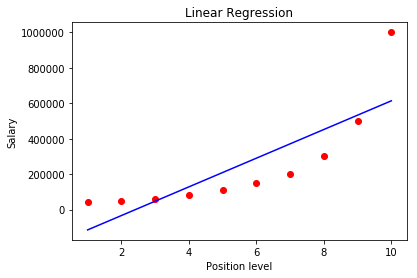

In [12]:
#Visualising Linear Regression
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

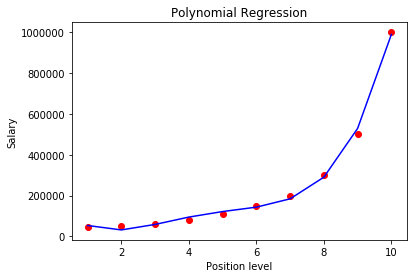

In [13]:
# Visualising Polynomial Regression
plt.scatter(X, y, color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color='blue' )
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

# 4. Decision tree (non linear and non continous regression model)

In [4]:
data=pd.read_csv('Section 8 - Decision Tree Regression/Position_Salaries.csv')

In [5]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
X=data.iloc[:,1:2].values
y=data.iloc[:,2].values

In [18]:
# fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [23]:
# predicting a result
y_pred=regressor.predict(X)

In [24]:
y_pred

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

In [31]:
y_pred1=regressor.predict(6.3)
y_pred1

array([150000.])

Text(0.5, 1.0, 'Decision Tree Regression')

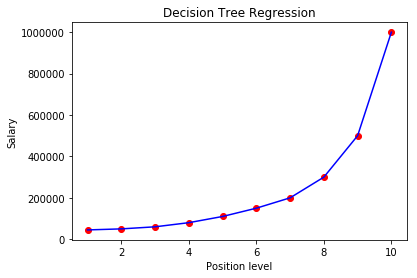

In [28]:
# Visualising Decision Tree Regression
plt.scatter(X,y, color='red')
plt.plot(X, y_pred, color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Decision Tree Regression')

Text(0.5, 1.0, 'Decision Tree Regression')

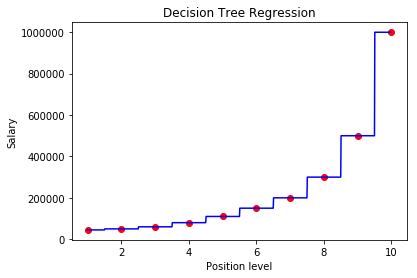

In [41]:
# Because Decission Tree Regression is non continous model, the above plot is is inappropriate to show the results
# The better plot is shown below
# it splits the whole range of the independent variables into different intervals 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X,y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Decision Tree Regression')


### 4.1 Exercise-predicting prices of apartments using Decision Tree

In [143]:
transactions=pd.read_excel('/home/kinga/python/Machine_Learning/transakcje_mieszkania.xlsx')

In [144]:
transactions.columns

Index(['Unnamed: 0', 'index', 'Adres', 'Cena', 'Cena_lokalu', 'Cena_zł/m2',
       'Data_transakcji', 'Forma obrotu', 'Funkcja dominująca',
       'Funkcja podstawowa', 'Identyfikator', 'Ilość_izb', 'Kondygnacja',
       'Liczba i rodzaj pomieszczeń przynależnych', 'Nr zmiany', 'Numer KW',
       'Numer transakcji/wyceny', 'Obręb', 'Opis', 'Opis nieruchomości',
       'Podstawa prawna', 'Pole powierzchni pomieszczeń przynależnych',
       'powierzchnia_lokalu', 'Rodzaj nieruchomości', 'Rodzaj obciążenia',
       'Rodzaj prawa objętego transakcją', 'Rodzaj zapisu', 'repertorium',
       'Udział w prawie będący przedmiotem transakcji',
       'Uzbrojenie istniejące', 'Uzbrojenie możliwe do podłączenia',
       'Współrzędne geometryczne środka budynku', 'miasto', 'adres_miasto',
       'ulica', 'numer_mieszkania', 'wspolrzedne', 'dlugosc', 'szerokosc'],
      dtype='object')

In [145]:
transactions=transactions[['Kondygnacja', 'Ilość_izb', 'powierzchnia_lokalu', 'dlugosc', 'szerokosc', 'Cena_zł/m2']]

In [146]:
# deleting rows with NaN values
transactions.dropna(axis=0, inplace=True)

In [147]:
# independent variables
X=transactions[['Kondygnacja', 'Ilość_izb', 'powierzchnia_lokalu', 'dlugosc', 'szerokosc']]
# dependent variable
y=transactions.iloc[:,5]

In [148]:
X.head()

,Kondygnacja,Ilość_izb,powierzchnia_lokalu,dlugosc,szerokosc
482,8.0,3.0,45.5,52.392632,16.975701
541,1.0,5.0,64.0,52.393696,16.982495
721,7.0,4.0,62.9,52.389267,16.985485
742,6.0,4.0,79.0,52.392632,16.975701
926,15.0,3.0,48.8,52.392632,16.975701


In [149]:
y.head()

482    5714.29
541    4796.88
721    4960.25
742    3797.47
926    4846.31
Name: Cena_zł/m2, dtype: float64

In [150]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)

In [151]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return(mae)

In [155]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [10, 50,70, 100, 200, 300, 400, 500, 600, 700, 800]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  791
Max leaf nodes: 50  		 Mean Absolute Error:  774
Max leaf nodes: 70  		 Mean Absolute Error:  792
Max leaf nodes: 100  		 Mean Absolute Error:  798
Max leaf nodes: 200  		 Mean Absolute Error:  839
Max leaf nodes: 300  		 Mean Absolute Error:  859
Max leaf nodes: 400  		 Mean Absolute Error:  891
Max leaf nodes: 500  		 Mean Absolute Error:  898
Max leaf nodes: 600  		 Mean Absolute Error:  913
Max leaf nodes: 700  		 Mean Absolute Error:  923
Max leaf nodes: 800  		 Mean Absolute Error:  928


In [157]:
regressor=DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)
regressor.fit(X_train, y_train)

# predicting prices
y_pred=regressor.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

774.3892417887225


# 5. Random Forest (non linear and non continous regression model)

In [62]:
cd '/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part2-Regression'

/home/kinga/python/Machine_Learning/Machine Learning A-Z New/Part2-Regression


In [63]:
# getting data
data=pd.read_csv('Section 8 - Decision Tree Regression/Position_Salaries.csv')

In [64]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [73]:
# independent variable
X=data.iloc[:, 1:2].values
# dependent variable
y=data.iloc[:,2].values

In [74]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [89]:
# fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, y)
regressor.predict(X)

array([ 48850.        ,  50916.66666667,  59550.        ,  76866.66666667,
       106933.33333333, 141966.66666667, 190700.        , 292500.        ,
       480333.33333333, 806666.66666667])

In [83]:
# predicting the result
regressor.predict(6.5)

array([160333.33333333])

Text(0.5, 1.0, 'Decision Tree Regression')

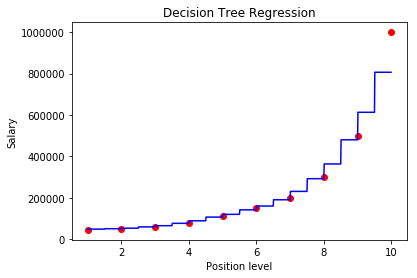

In [84]:
# visualising the results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X,y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Decision Tree Regression')